# CNN

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data to include channel dimension (grayscale = 1 channel)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Print dataset information
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train_cat.shape}")
print(f"Test labels shape: {y_test_cat.shape}")

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)
Training labels shape: (60000, 10)
Test labels shape: (10000, 10)


In [28]:
# Build the CNN model
model = Sequential([
    # First convolutional layer
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional layer
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output for the dense layers
    Flatten(),

    # Fully connected layers
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Train the model
history = model.fit(
    X_train, y_train_cat,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 94s 219ms/step - accuracy: 0.7766 - loss: 0.6909 - val_accuracy: 0.9843 - val_loss: 0.0528
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 139s 212ms/step - accuracy: 0.9714 - loss: 0.1001 - val_accuracy: 0.9900 - val_loss: 0.0372
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 91s 216ms/step - accuracy: 0.9805 - loss: 0.0652 - val_accuracy: 0.9913 - val_loss: 0.0299
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 144s 220ms/step - accuracy: 0.9854 - loss: 0.0486 - val_accuracy: 0.9895 - val_loss: 0.0363
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 141s 217ms/step - accuracy: 0.9873 - loss: 0.0419 - val_accuracy: 0.9918 - val_loss: 0.0316
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 144s 222ms/step - accuracy: 0.9902 - loss: 0.0324 - val_accuracy: 0.9922 - val_loss: 0.0283
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 92s 218ms/step - accuracy: 0.9915 - loss: 0.0280 - val_accuracy: 0.9910 - val_loss: 0.0285
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 146s 228ms/step - accuracy: 0.9922 - lo

In [30]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"\nTest accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9903 - loss: 0.0347

Test accuracy: 0.9927
Test loss: 0.0257


In [31]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



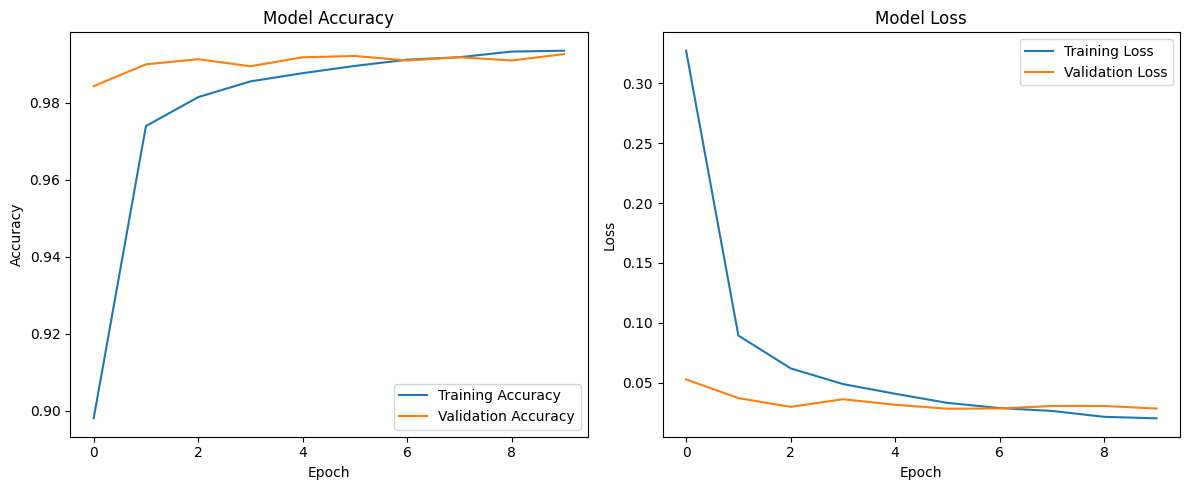

In [32]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

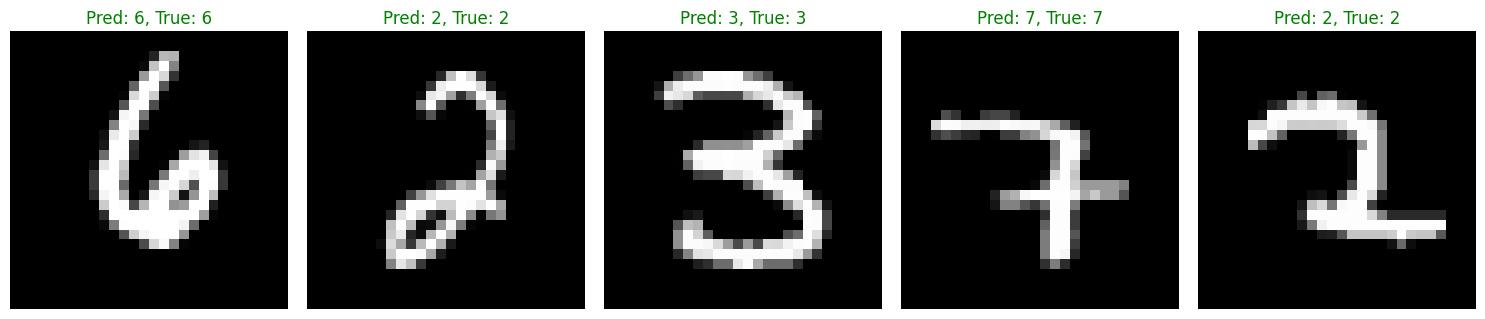

In [33]:
# Visualize some predictions
def plot_predictions(X, y_true, y_pred, n_samples=5):
    plt.figure(figsize=(15, 15))
    for i in range(n_samples):
        plt.subplot(5, 5, i+1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')

        # Show prediction and actual value in the title
        predicted = np.argmax(y_pred[i])
        actual = y_true[i]

        color = 'green' if predicted == actual else 'red'
        plt.title(f"Pred: {predicted}, True: {actual}", color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Select some random test samples
indices = np.random.choice(len(X_test), 5, replace=False)
plot_predictions(X_test[indices], y_test[indices], y_pred[indices])

Sample image true label: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_11']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


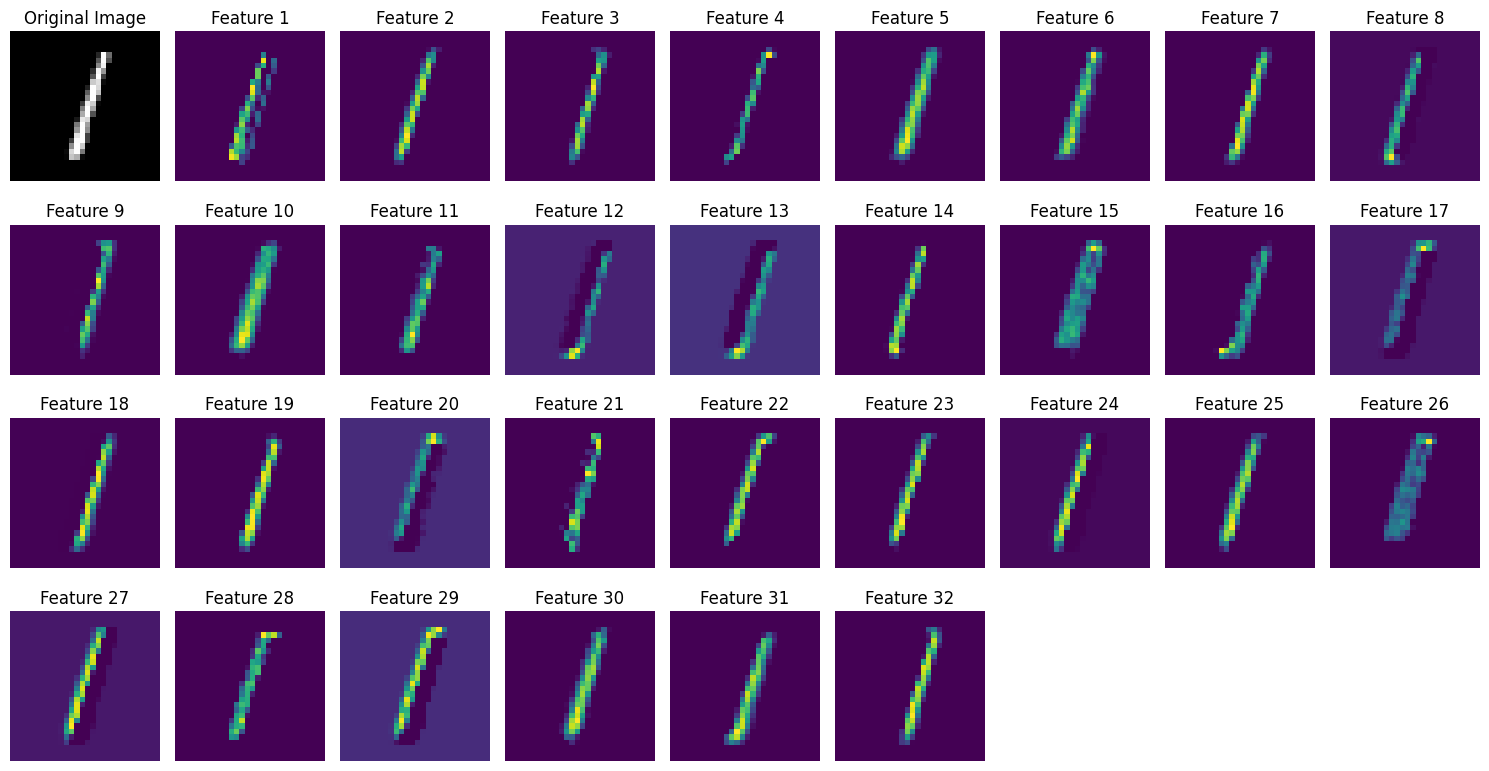

In [34]:
# Visualize feature maps for a sample image
def visualize_feature_maps(model, image):
    # Create a model that outputs feature maps from the first convolutional layer
    feature_map_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=model.layers[0].output  # Output of first conv layer
    )

    # Get feature maps for the input image
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    feature_maps = feature_map_model.predict(image)

    # Plot the feature maps
    plt.figure(figsize=(15, 8))

    # Plot the original image
    plt.subplot(4, 9, 1)
    plt.imshow(image[0].reshape(28, 28), cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Plot the first 32 feature maps
    for i in range(32):
        plt.subplot(4, 9, i+2)
        plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
        plt.title(f'Feature {i+1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Select a sample image
sample_image = X_test[2]
sample_label = y_test[2]
print(f"Sample image true label: {sample_label}")

# Visualize feature maps
visualize_feature_maps(model, sample_image)

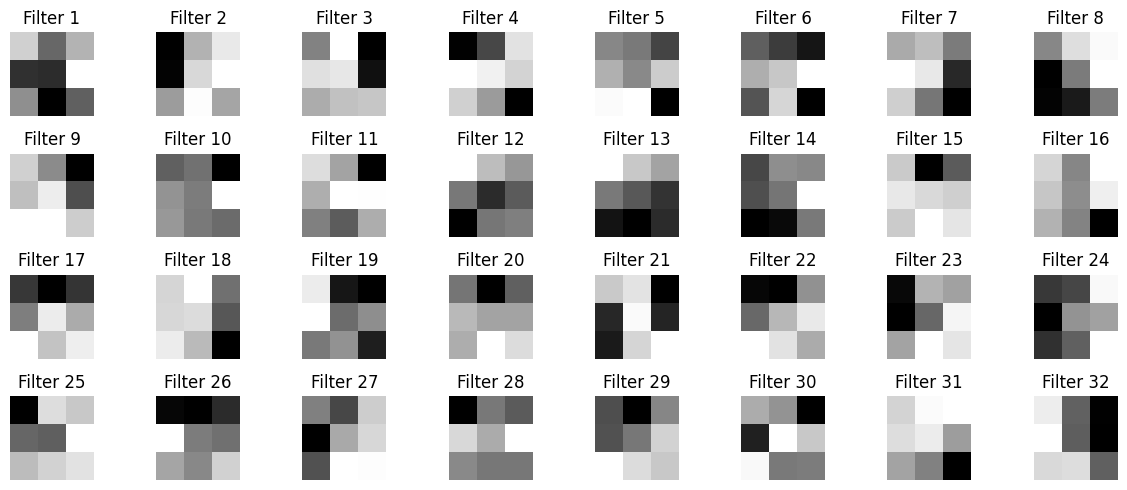

In [35]:
# Visualize filters in the first convolutional layer
def visualize_filters(model):
    filters = model.layers[0].get_weights()[0]

    # Normalize filter values for better visualization
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    plt.figure(figsize=(12, 5))
    for i in range(32):
        plt.subplot(4, 8, i+1)
        plt.imshow(filters[:, :, 0, i], cmap='gray')
        plt.axis('off')
        plt.title(f'Filter {i+1}')

    plt.tight_layout()
    plt.show()

# Visualize filters
visualize_filters(model)

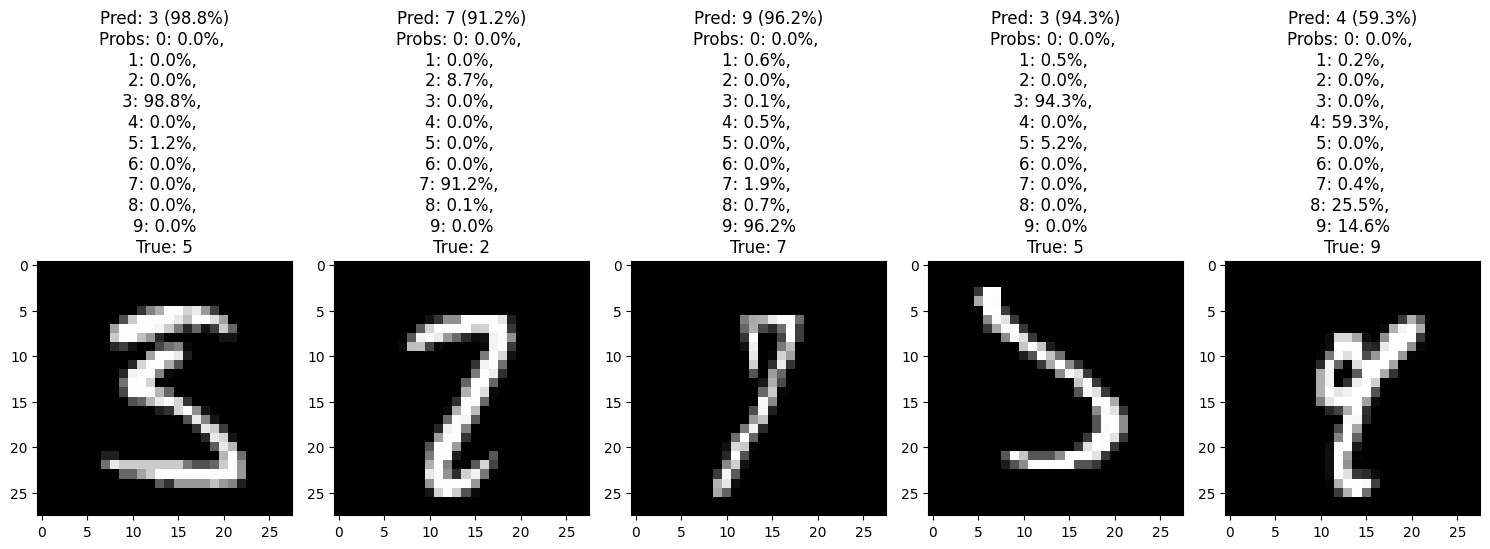

In [36]:
# Find and display misclassified examples
def show_misclassified(X, y_true, y_pred, n_samples=5):
    y_pred_classes = np.argmax(y_pred, axis=1)
    misclassified = np.where(y_pred_classes != y_true)[0]

    if len(misclassified) > 0:
        indices = np.random.choice(misclassified, min(n_samples, len(misclassified)), replace=False)

        plt.figure(figsize=(15, 10))
        for i, idx in enumerate(indices):
            plt.subplot(2, 5, i+1)
            plt.imshow(X[idx].reshape(28, 28), cmap='gray')

            predicted = y_pred_classes[idx]
            actual = y_true[idx]
            confidence = y_pred[idx][predicted] * 100
            # Build a string showing each class's probability as a percentage
            probs_str = ", \n".join([f"{c}: {p*100:.1f}%" for c, p in enumerate(y_pred[idx])])

            # Include everything in the title
            plt.title(f"Pred: {predicted} ({confidence:.1f}%)\n"
                      f"Probs: {probs_str}\n"
                      f"True: {actual}")

        plt.tight_layout()
        plt.show()
    else:
        print("No misclassified samples found.")

# Show misclassified examples
show_misclassified(X_test, y_test, y_pred)